# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

#np.random.seed(5)
%matplotlib inline

In [2]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (537, 64), y.shape: (537,)


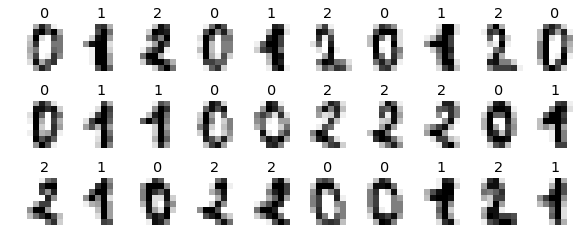

In [3]:
fig, axes = plt.subplots(3, 10, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()): ###迭代只能使用一維陣列，因此使用ravel轉換
    ax.imshow(X[i].reshape(8, 8), cmap=plt.cm.binary)
    ax.axis('off')
    ax.set_title(y[i])

In [4]:
def pca(data, target, title, n_components=3):
    
    pca = decomposition.PCA(n_components=n_components)
    pca.fit(data)
    data = pca.transform(data)
    
    fig = plt.figure(figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=25, azim=40)
    
    for label in np.unique(target):
        ax.text3D(data[target==label, 0].mean(),
                  data[target==label, 1].mean(),
                  data[target==label, 2].mean(), str(label),
                  horizontalalignment='center', size=13, 
                  bbox=dict(alpha=0.7, edgecolor='w', facecolor='w'))
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=target.astype(np.float),
               cmap=plt.cm.prism, edgecolor='k')
    ax.set_xlabel('PCA-1')
    ax.set_ylabel('PCA-2')
    ax.set_zlabel('PCA-3')
    ax.set_title(title, y=1.01, fontsize=15)
    plt.show()

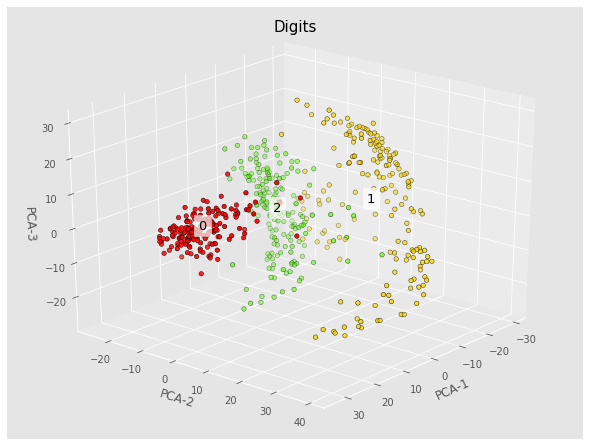

In [5]:
pca(X, y, 'Digits', n_components=3)